In [1]:
# pykrx 모듈 설치
!pip install pykrx
!pip install C:\Users\kdr\Desktop\KB_work\TA_Lib-0.4.24-cp39-cp39-win_amd64.whl
!pip install finterstellar

Processing c:\users\kdr\desktop\kb_work\ta_lib-0.4.24-cp39-cp39-win_amd64.whl
TA-Lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [2]:
# 모듈 importing
from pykrx import stock
from pykrx import bond
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager, rc
import mplfinance as mpf
import talib
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

# stock module

In [3]:
for ticker in stock.get_index_ticker_list():
    print(ticker, stock.get_index_ticker_name(ticker))

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1022 
1024 증권
1025 보험
1026 서비스업
1027 제조업
1028 코스피 200
1034 코스피 100
1035 코스피 50
1150 코스피 200 커뮤니케이션서비스
1151 코스피 200 건설
1152 코스피 200 중공업
1153 코스피 200 철강/소재
1154 코스피 200 에너지/화학
1155 코스피 200 정보기술
1156 코스피 200 금융
1157 코스피 200 생활소비재
1158 코스피 200 경기소비재
1159 코스피 200 산업재
1160 코스피 200 헬스케어
1167 코스피 200 중소형주
1182 코스피 200 초대형제외 지수
1224 코스피 200 비중상한 30%
1227 코스피 200 비중상한 25%
1232 코스피 200 비중상한 20%
1244 코스피200제외 코스피지수
1894 코스피 200 TOP 10


In [4]:
# ticker-인덱스명
tmp = []
for ticker in stock.get_index_ticker_list():
    tmp.append([ticker, stock.get_index_ticker_name(ticker)])

# 데이터 프레임 생성
scale_2022 = pd.DataFrame(tmp).iloc[:4,:]

# 열 명 변경
scale_2022.columns = ['ticker','name2022']

scale_2022

ticker name2022
0   1001      코스피
1   1002  코스피 대형주
2   1003  코스피 중형주
3   1004  코스피 소형주

In [5]:
# DataFrame 구축

# DF 생성
df_scale_day = pd.DataFrame([])          # 일단위 데이터
df_scale_month = pd.DataFrame([])        # 월단위 데이터
df_scale_year = pd.DataFrame([])         # 년단위 데이터

# DF 내용 쓰기
for j in range(scale_2022.iloc[:,0].count()):
    # ticker 값을 i에 저장
    i = scale_2022.iloc[j,0]
    
    # temp DF에 2000.01.01~2022.09.01 규모별 ohlcv와 fundamental 쓰기(merge 이용하여 옆으로 붙임.)
    temp_day = pd.merge(stock.get_index_ohlcv("20030301", "20220901", str(i)).reset_index(), 
                     stock.get_index_fundamental("20030301", "20220901", str(i)).reset_index(), 
                     how='outer')
    temp_month = stock.get_index_ohlcv("20030301", "20220901", str(i),'m').reset_index()
                
    temp_year = stock.get_index_ohlcv("20030301", "20211231", str(i),'y').reset_index()
    
    # 해당 섹터 ticker, 섹터 명칭 쓰기
    temp_day['scale_name'] = stock.get_index_ticker_name(i)
    temp_day['scale_ticker'] = i
    
    temp_month['scale_name'] = stock.get_index_ticker_name(i)
    temp_month['scale_ticker'] = i
    
    temp_year['scale_name'] = stock.get_index_ticker_name(i)
    temp_year['scale_ticker'] = i
    
    # 임시 DF를 결과물 DF에 합치기
    df_scale_day = pd.concat([df_scale_day,temp_day])
    df_scale_month = pd.concat([df_scale_month,temp_month])
    df_scale_year = pd.concat([df_scale_year,temp_year])

# 칼럼명 영어로 변환
df_scale_day.columns = ['date','Open','High','Low','Close','Volume','Volume($)',
                     'Market_Cap','Change','PER','FWDPER','PBR','dividend_Yield','scale_name','scale_ticker']
df_scale_month.columns = ['date','Open','High','Low','Close','Volume','Volume($)','scale_name','scale_ticker']
df_scale_year.columns = ['date','Open','High','Low','Close','Volume','Volume($)','scale_name','scale_ticker']

In [6]:
# 일자별 데이터를 규모별로 분리

df_scale_day_kospi = df_scale_day[df_scale_day['scale_name']=='코스피'] 
df_scale_day_small = df_scale_day[df_scale_day['scale_name']=='코스피 소형주']
df_scale_day_medium = df_scale_day[df_scale_day['scale_name']=='코스피 중형주']
df_scale_day_large = df_scale_day[df_scale_day['scale_name']=='코스피 대형주']

In [7]:
# 월별 데이터를 규모별로 분리

df_scale_month_kospi = df_scale_month[df_scale_month['scale_name']=='코스피']
df_scale_month_small = df_scale_month[df_scale_month['scale_name']=='코스피 소형주']
df_scale_month_medium = df_scale_month[df_scale_month['scale_name']=='코스피 중형주']
df_scale_month_large = df_scale_month[df_scale_month['scale_name']=='코스피 대형주']

In [8]:
# 년별 데이터를 규모별로 분리

df_scale_year_kospi = df_scale_year[df_scale_year['scale_name']=='코스피']
df_scale_year_small = df_scale_year[df_scale_year['scale_name']=='코스피 소형주']
df_scale_year_medium = df_scale_year[df_scale_year['scale_name']=='코스피 중형주']
df_scale_year_large = df_scale_year[df_scale_year['scale_name']=='코스피 대형주']

In [9]:
df_scale_year_medium

date     Open     High      Low    Close       Volume  \
0  2003-12-31   518.94   716.20   452.31   700.69  25548674001   
1  2004-12-31   704.89   847.61   603.37   828.81  28430066270   
2  2005-12-31   832.05  1610.84   828.53  1578.17  32539959440   
3  2006-12-31  1586.55  1685.34  1292.91  1667.41  20971456963   
4  2007-12-31  1667.25  2881.69  1482.63  2445.11  21029539605   
5  2008-12-31  2440.52  2452.83   949.72  1397.04  20916119547   
6  2009-12-31  1398.42  2081.33  1247.48  1986.60  31394654308   
7  2010-12-31  1983.88  2296.98  1685.12  2266.32  16431565323   
8  2011-12-31  2280.15  2635.36  1964.86  2124.86  19929369860   
9  2012-12-31  2123.26  2298.96  1847.39  2096.98  13259143882   
10 2013-12-31  2108.35  2309.62  1991.78  2170.68  15768949513   
11 2014-12-31  2175.33  2406.45  2119.79  2224.46  10554063917   
12 2015-12-31  2218.95  3111.54  2200.95  2693.76  13990909188   
13 2016-12-31  2691.91  2792.92  2357.20  2491.21  18833486089   
14 2017-12-31  2490.06  2834.23  2430.34  2735.16  16749898867   
15 2018-12-31  2751.50  3045.69  2165.56  2423.77  14232655164   
16 2019-12-31  2433.13  2629.62  1981.53  2238.19  13966623061   
17 2020-12-31  2240.87  2993.88  1336.38  2953.99  41796342942   
18 2021-12-31  2961.27  3670.86  2925.97  3296.42  44727539877   

          Volume($) scale_name scale_ticker  
0    25653893437330    코스피 중형주         1003  
1    30140231557415    코스피 중형주         1003  
2    59845228332985    코스피 중형주         1003  
3    70303266749015    코스피 중형주         1003  
4   107237769129395    코스피 중형주         1003  
5    58927847132250    코스피 중형주         1003  
6    90734652356280    코스피 중형주         1003  
7   111906304698085    코스피 중형주         1003  
8   115590934203330    코스피 중형주         1003  
9   125260334580026    코스피 중형주         1003  
10  135752896011758    코스피 중형주         1003  
11  150338483430155    코스피 중형주         1003  
12  183883817262735    코스피 중형주         1003  
13  166172856213879    코스피 중형주         1003  
14  180508514805825    코스피 중형주         1003  
15  171688714864375    코스피 중형주         1003  
16  161999129844013    코스피 중형주         1003  
17  215639619468427    코스피 중형주         1003  
18  256265891027277    코스피 중형주         1003

In [10]:
df_scale_year_large

date     Open     High      Low    Close       Volume  \
0  2003-12-31   563.90   819.06   501.19   805.07  36774154672   
1  2004-12-31   810.36   940.20   709.85   882.84  22818894331   
2  2005-12-31   885.67  1351.88   856.38  1347.45  21787626180   
3  2006-12-31  1350.75  1441.98  1174.92  1405.02  19313936188   
4  2007-12-31  1409.91  1980.77  1318.70  1828.24  20539954500   
5  2008-12-31  1821.93  1856.38   876.42  1094.56  33697477794   
6  2009-12-31  1103.45  1679.42   960.20  1643.82  30110151342   
7  2010-12-31  1642.86  2043.27  1507.11  2039.99  20844868534   
8  2011-12-31  2052.06  2219.84  1595.44  1783.06  22377193067   
9  2012-12-31  1790.28  2045.08  1747.29  1991.07  14019156120   
10 2013-12-31  2008.63  2052.10  1735.26  1995.67  11872951616   
11 2014-12-31  1996.82  2059.06  1822.74  1852.81  11220278535   
12 2015-12-31  1850.69  2079.53  1659.37  1836.84  13486322610   
13 2016-12-31  1828.39  1972.13  1700.42  1941.33  10739763106   
14 2017-12-31  1936.12  2540.71  1930.37  2419.11  13745666229   
15 2018-12-31  2424.46  2529.84  1936.93  1958.69  15727009381   
16 2019-12-31  1967.57  2197.21  1857.22  2173.71  14084759731   
17 2020-12-31  2177.14  2864.85  1443.81  2859.22  29337843708   
18 2021-12-31  2859.27  3303.26  2736.22  2905.03  30119848969   

           Volume($) scale_name scale_ticker  
0    311483625042375    코스피 대형주         1002  
1    346671999328965    코스피 대형주         1002  
2    549870022952150    코스피 대형주         1002  
3    592462876308440    코스피 대형주         1002  
4    755266308078510    코스피 대형주         1002  
5    475316400654730    코스피 대형주         1002  
6    733130137170010    코스피 대형주         1002  
7    927941061243150    코스피 대형주         1002  
8    844206104634580    코스피 대형주         1002  
9    950580254432920    코스피 대형주         1002  
10   962578415025210    코스피 대형주         1002  
11   890595413785830    코스피 대형주         1002  
12   914466755619990    코스피 대형주         1002  
13  1008408404386405    코스피 대형주         1002  
14  1252761147400140    코스피 대형주         1002  
15  1058443909667735    코스피 대형주         1002  
16  1182428938457065    코스피 대형주         1002  
17  1573782501873735    코스피 대형주         1002  
18  1658544478229730    코스피 대형주         1002

# 연도별 코스피 기준 대형주,중형주,소형주 추이변화

In [11]:
len(df_scale_year['date'].dt.year.unique())

19

Text(0.5, 1.0, '연도별 코스피 기준 대형주,중형주,소형주 추이변화(연별데이터기준)')

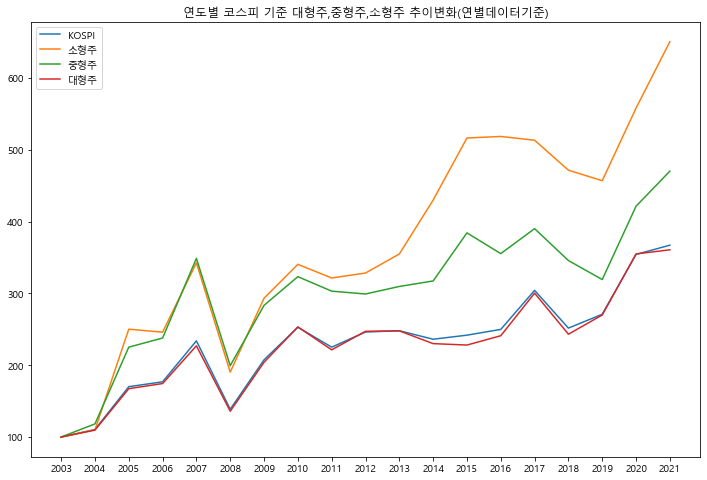

In [12]:
df_scale_year_kospi_index = (df_scale_year_kospi['Close'] / df_scale_year_kospi['Close'][0]) * 100
df_scale_year_small_index = (df_scale_year_small['Close'] / df_scale_year_small['Close'][0]) * 100
df_scale_year_medium_index = (df_scale_year_medium['Close'] / df_scale_year_medium['Close'][0]) * 100
df_scale_year_large_index = (df_scale_year_large['Close'] / df_scale_year_large['Close'][0]) * 100

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

xtick_label_position = list(range(len(df_scale_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_scale_year_large['date'].dt.year.unique())
ax.plot(xtick_label_position,df_scale_year_kospi_index,label="KOSPI")
ax.plot(df_scale_year_small_index,label="소형주")
ax.plot(df_scale_year_medium_index,label="중형주")
ax.plot(df_scale_year_large_index,label="대형주")

plt.legend()
plt.title("연도별 코스피 기준 대형주,중형주,소형주 추이변화(연별데이터기준)")


In [13]:
range(len(df_scale_month['date'].dt.year.unique()))

range(0, 20)

In [14]:
df_scale_month['date'].dt.year.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

Text(0.5, 1.0, '연도별 코스피 기준 대형주,중형주,소형주 추이변화(월별데이터기준)')

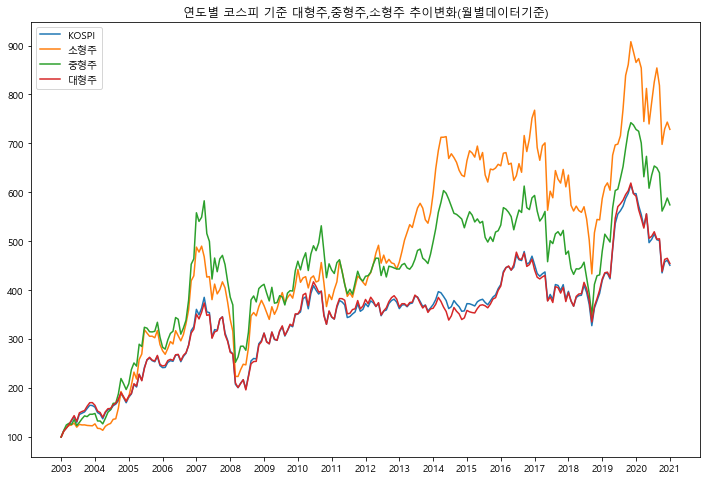

In [15]:
df_scale_month_kospi_index = (df_scale_month_kospi['Close'] / df_scale_month_kospi['Close'][0]) * 100
df_scale_month_small_index = (df_scale_month_small['Close'] / df_scale_month_small['Close'][0]) * 100
df_scale_month_medium_index = (df_scale_month_medium['Close'] / df_scale_month_medium['Close'][0]) * 100
df_scale_month_large_index = (df_scale_month_large['Close'] / df_scale_month_large['Close'][0]) * 100

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)


ax.plot(df_scale_month_kospi_index,label="KOSPI")
ax.plot(df_scale_month_small_index,label="소형주")
ax.plot(df_scale_month_medium_index,label="중형주")
ax.plot(df_scale_month_large_index,label="대형주")
plt.xticks(list(i for i in range(0,240,13)),df_scale_year_kospi['date'].dt.year.unique())
plt.legend()
plt.title("연도별 코스피 기준 대형주,중형주,소형주 추이변화(월별데이터기준)")


Text(0.5, 1.0, '연도별 코스피 기준 대형주,중형주,소형주 추이변화(일별데이터기준)')

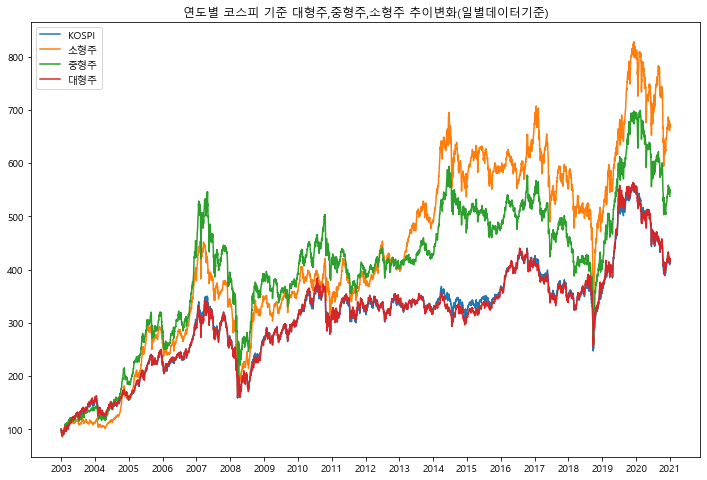

In [16]:
df_scale_day_kospi_index = (df_scale_day_kospi['Close'] / df_scale_day_kospi['Close'][0]) * 100
df_scale_day_small_index = (df_scale_day_small['Close'] / df_scale_day_small['Close'][0]) * 100
df_scale_day_medium_index = (df_scale_day_medium['Close'] / df_scale_day_medium['Close'][0]) * 100
df_scale_day_large_index = (df_scale_day_large['Close'] / df_scale_day_large['Close'][0]) * 100

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)


ax.plot(df_scale_day_kospi_index,label="KOSPI")
ax.plot(df_scale_day_small_index,label="소형주")
ax.plot(df_scale_day_medium_index,label="중형주")
ax.plot(df_scale_day_large_index,label="대형주")
plt.xticks(list(i for i in range(0,4825,268)),df_scale_year_kospi['date'].dt.year.unique())
plt.legend()
plt.title("연도별 코스피 기준 대형주,중형주,소형주 추이변화(일별데이터기준)")


# 연도별 코스피 기준 대형주,중형주,소형주 추이변화(캔들)

In [17]:
df_scale_day_medium[['date','Open','High','Close','Volume','Change']].set_index('date')


Open     High    Close     Volume  Change
date                                                    
2003-03-03   518.94   522.88   522.72   75298697    0.84
2003-03-04   518.53   518.90   513.71   83133514   -1.72
2003-03-05   509.89   509.89   502.52  114599717   -2.18
2003-03-06   503.72   504.92   495.54   97464719   -1.39
2003-03-07   487.55   487.71   480.55   84000864   -3.02
...             ...      ...      ...        ...     ...
2022-08-26  2901.70  2907.75  2897.45  129430122    0.21
2022-08-29  2842.38  2849.80  2842.55  156902125   -1.89
2022-08-30  2852.49  2871.70  2865.26   90898583    0.80
2022-08-31  2855.07  2883.23  2879.44  107223046    0.49
2022-09-01  2860.52  2864.85  2811.13  109276479   -2.37

[4825 rows x 5 columns]

## KOSPI, 대형주, 중형주, 소형주 지수 그래프(거래량 포함)

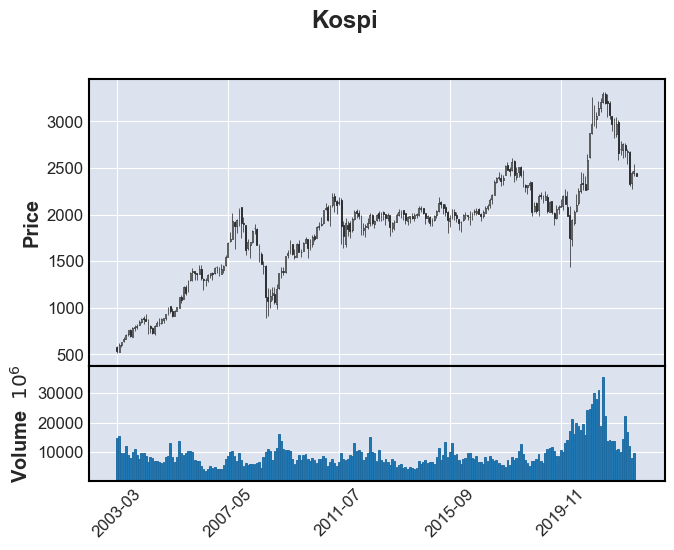

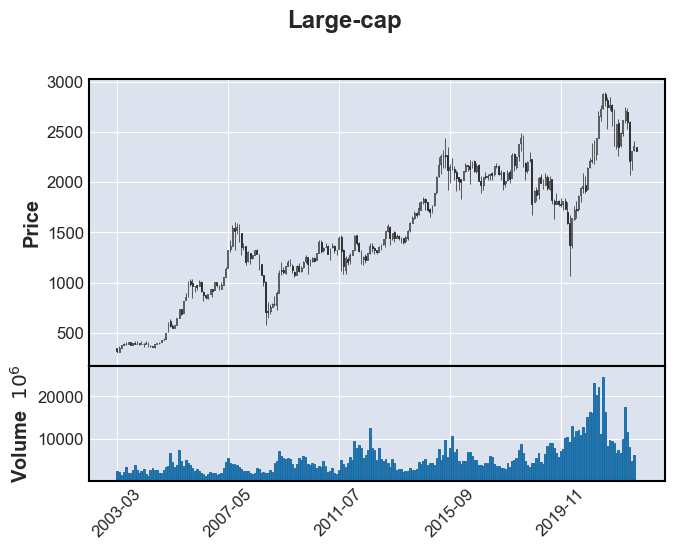

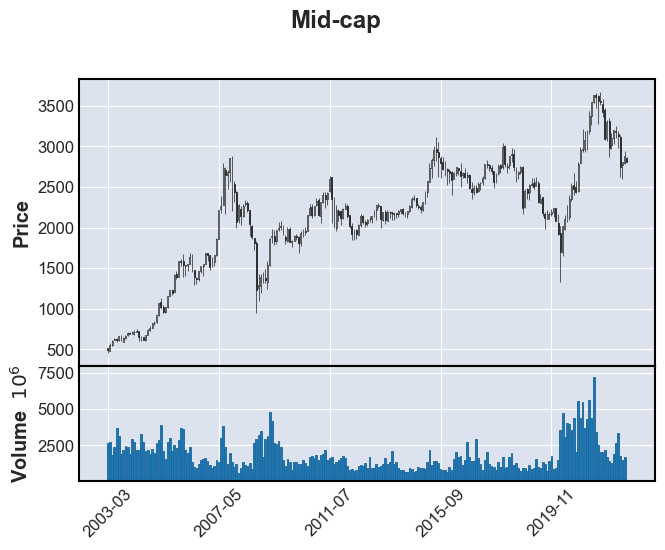

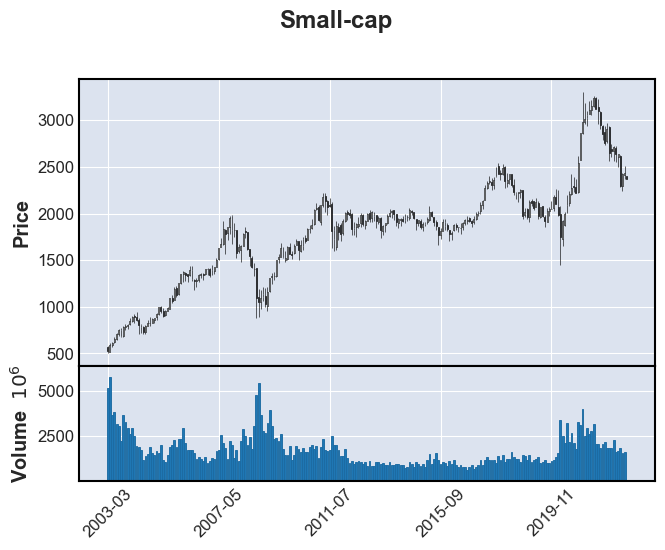

In [18]:
df_scale_day_kospi_index = (df_scale_day_kospi['Close'] / df_scale_day_kospi['Close'][0]) * 100
df_scale_day_small_index = (df_scale_day_small['Close'] / df_scale_day_small['Close'][0]) * 100
df_scale_day_medium_index = (df_scale_day_medium['Close'] / df_scale_day_medium['Close'][0]) * 100
df_scale_day_large_index = (df_scale_day_large['Close'] / df_scale_day_large['Close'][0]) * 100


mpf.plot(df_scale_month_kospi[['date','Open','High','Low','Close','Volume']].set_index('date'),type='candle',title='Kospi',datetime_format='%Y-%m',volume=True)
mpf.plot(df_scale_month_small[['date','Open','High','Low','Close','Volume']].set_index('date'),type='candle',title='Large-cap',datetime_format='%Y-%m',volume=True)
mpf.plot(df_scale_month_medium[['date','Open','High','Low','Close','Volume']].set_index('date'),type='candle',title='Mid-cap',datetime_format='%Y-%m',volume=True)
mpf.plot(df_scale_month_large[['date','Open','High','Low','Close','Volume']].set_index('date'),type='candle',title='Small-cap',datetime_format='%Y-%m',volume=True)


# RSI 상관관계

In [19]:
def get_RSI(x):
    """
    종목에 대한 DataFrame 형식의 OHLCV를 받아와 14일, 30일, 50일, 200일 RSI를 반환하는 함수입니다.
    """
    try:
        for n in [14, 30, 50, 200]:
            x['RSI' + str(n)] = talib.RSI(x['Close'].values,
                                    timeperiod = n)     
    except:
        x = x.astype('float64')
        for n in [14, 30, 50, 200]:
            x['RSI' + str(n)] = talib.RSI(x['Close'].values,
                                        timeperiod = n)     
    return x
def get_RSI_OHLCV(x):
    """
    종목에 대한 DataFrame 형식의 OHLCV를 받아와 14일, 30일, 50일, 200일 RSI를 반환하는 함수입니다.
    """
    try:
        for n in [14, 30, 50, 200]:
            x['RSI' + str(n)] = talib.RSI(x['종가'].values,
                                    timeperiod = n)     
    except:
        x = x.astype('float64')
        for n in [14, 30, 50, 200]:
            x['RSI' + str(n)] = talib.RSI(x['종가'].values,
                                        timeperiod = n)     
    return x

In [20]:
# 일별 데이터 RSI(14) 컬럼 추가
df_scale_day_kospi = get_RSI(df_scale_day_kospi)
df_scale_day_large = get_RSI(df_scale_day_large)
df_scale_day_medium = get_RSI(df_scale_day_medium)
df_scale_day_small = get_RSI(df_scale_day_small)

# 월별 데이터 RSI(14) 컬럼 추가
df_scale_month_kospi = get_RSI(df_scale_month_kospi)
df_scale_month_large = get_RSI(df_scale_month_large)
df_scale_month_medium = get_RSI(df_scale_month_medium)
df_scale_month_small = get_RSI(df_scale_month_small)

# 년별 데이터 RSI(14) 컬럼 추가
df_scale_year_kospi = get_RSI(df_scale_year_kospi)
df_scale_year_large = get_RSI(df_scale_year_large)
df_scale_year_medium = get_RSI(df_scale_year_medium)
df_scale_year_small = get_RSI(df_scale_year_small)


C:\Users\kdr\AppData\Local\Temp\ipykernel_28464\424247175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['RSI' + str(n)] = talib.RSI(x['Close'].values,
C:\Users\kdr\AppData\Local\Temp\ipykernel_28464\424247175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['RSI' + str(n)] = talib.RSI(x['Close'].values,
C:\Users\kdr\AppData\Local\Temp\ipykernel_28464\424247175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

C:\Users\kdr\AppData\Local\Temp\ipykernel_28464\424247175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['RSI' + str(n)] = talib.RSI(x['Close'].values,
C:\Users\kdr\AppData\Local\Temp\ipykernel_28464\424247175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['RSI' + str(n)] = talib.RSI(x['Close'].values,
C:\Users\kdr\AppData\Local\Temp\ipykernel_28464\424247175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

C:\Users\kdr\AppData\Local\Temp\ipykernel_28464\424247175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['RSI' + str(n)] = talib.RSI(x['Close'].values,


## KOSPI 지수와 KOSPI RSI 그래프

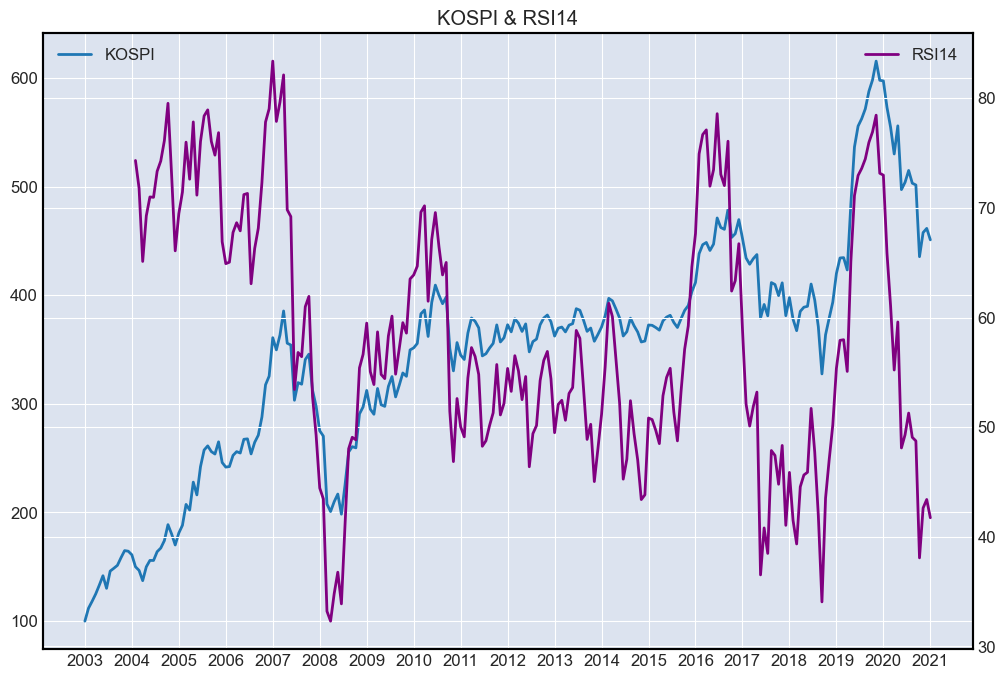

In [21]:
df_scale_day_kospi_index = (df_scale_day_kospi['Close'] / df_scale_day_kospi['Close'][0]) * 100
df_scale_day_small_index = (df_scale_day_small['Close'] / df_scale_day_small['Close'][0]) * 100
df_scale_day_medium_index = (df_scale_day_medium['Close'] / df_scale_day_medium['Close'][0]) * 100
df_scale_day_large_index = (df_scale_day_large['Close'] / df_scale_day_large['Close'][0]) * 100

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot()
ax1.plot(df_scale_month_kospi_index,label="KOSPI")
plt.legend()
color = 'purple'
ax2 = ax1.twinx()
ax2.plot(df_scale_month_kospi['RSI14'],label="RSI14",color=color)
plt.legend()

plt.xticks(list(i for i in range(0,240,13)),df_scale_year_kospi['date'].dt.year.unique())
plt.title("KOSPI & RSI14")
plt.show()


In [22]:
df_scale_month_kospi

date     Open     High      Low    Close       Volume  \
0   2003-03-31   578.50   590.55   512.30   535.70  14942249679   
1   2003-04-30   529.07   627.50   525.51   599.35  15513386315   
2   2003-05-31   600.47   637.19   582.87   633.42   9592714942   
3   2003-06-30   643.93   690.70   632.47   669.93   9797244501   
4   2003-07-31   666.45   724.53   663.35   713.52  12007735129   
..         ...      ...      ...      ...      ...          ...   
230 2022-05-31  2669.21  2702.10  2546.80  2685.90  16868003801   
231 2022-06-30  2670.74  2681.51  2306.48  2332.64  12014671402   
232 2022-07-31  2342.92  2463.05  2276.63  2451.50   7955652326   
233 2022-08-31  2444.05  2546.35  2417.01  2472.05   9767925852   
234 2022-09-30  2443.00  2443.61  2415.61  2415.61    580021246   

            Volume($) scale_name scale_ticker      RSI14      RSI30  \
0     220890646644150        코스피         1001        NaN        NaN   
1     247921519307465        코스피         1001        NaN        NaN   
2     261398853063320        코스피         1001        NaN        NaN   
3     277999589572255        코스피         1001        NaN        NaN   
4     296472237861275        코스피         1001        NaN        NaN   
..                ...        ...          ...        ...        ...   
230  2113784328537123        코스피         1001  48.742914  53.347771   
231  1835493487294140        코스피         1001  38.078063  47.014698   
232  1931903737357025        코스피         1001  42.626679  49.117187   
233  1948130001179758        코스피         1001  43.400794  49.475761   
234  1904334718445549        코스피         1001  41.735240  48.504607   

         RSI50     RSI200  
0          NaN        NaN  
1          NaN        NaN  
2          NaN        NaN  
3          NaN        NaN  
4          NaN        NaN  
..         ...        ...  
230  54.467481  56.756129  
231  50.078737  55.326816  
232  51.422592  55.704038  
233  51.652204  55.768936  
234  50.976926  55.544311  

[235 rows x 13 columns]

In [23]:
# 월별 데이터 사용
import plotly.graph_objects as go
import plotly.subplots as ms

candle = go.Candlestick(
x=df_scale_month_kospi.index,
open=df_scale_month_kospi['Open'],
high=df_scale_month_kospi['High'],
low=df_scale_month_kospi['Low'],
close=df_scale_month_kospi['Close'],
name='KOSPI')

RSI = go.Scatter(x=df_scale_month_kospi['date'], y=df_scale_month_kospi['RSI14'], line=dict(color='purple', width=2), name='RSI')

fig = ms.make_subplots(rows=5, cols=1, specs=[[{'rowspan':4}],[None],[None],[None],[{}]]
,shared_xaxes=True, horizontal_spacing=0.03, vertical_spacing=0.05)
fig.add_trace(candle,row=1,col=1)
fig.add_trace(RSI,row=5,col=1)
fig.update_layout(width=1000, height=800, xaxis_rangeslider_visible=False,title_text="KOSPI & RSI14(month)", title_x=0.5)

fig.show()

In [24]:
# 일별 데이터 사용
import plotly.graph_objects as go
import plotly.subplots as ms

candle = go.Candlestick(
x=df_scale_day_kospi.index,
open=df_scale_day_kospi['Open'],
high=df_scale_day_kospi['High'],
low=df_scale_day_kospi['Low'],
close=df_scale_day_kospi['Close'],
name='KOSPI')

RSI = go.Scatter(x=df_scale_day_kospi['date'], y=df_scale_day_kospi['RSI14'], line=dict(color='purple', width=2), name='RSI')

fig = ms.make_subplots(rows=5, cols=1, specs=[[{'rowspan':4}],[None],[None],[None],[{}]]
,shared_xaxes=True, horizontal_spacing=0.03, vertical_spacing=0.05)
fig.add_trace(candle,row=1,col=1)
fig.add_trace(RSI,row=5,col=1)
fig.update_layout(width=1000, height=800, xaxis_rangeslider_visible=False,title_text="KOSPI & RSI14(day)", title_x=0.5)

fig.show()

In [25]:
RSI = go.Scatter(x=df_scale_month_kospi.index, y=df_scale_month_kospi['RSI14'], line=dict(color='red', width=2), name='RSI',legendgrouptitle_text='RSI')
fig = ms.make_subplots(rows=1, cols=1, shared_xaxes=True, horizontal_spacing=0.03, vertical_spacing=0.01)
fig.add_trace(RSI,row=1,col=1)


## 대형주,중형주,소형주 지수를 통한 RSI 전량 백테스팅
- RSI 30 미만 시 당일 시간 외 시장에서 매수
- RSI 70 초과 시 당일 시간 외 시장에서 매도

In [26]:
len(df_scale_day_kospi.index)

4825

In [27]:
df_scale_day_kospi.loc[df_scale_day_kospi.index[100]].shift(1)

date                              NaN
Open              2003-07-28 00:00:00
High                           715.44
Low                            719.21
Close                          714.42
Volume                          717.8
Volume($)                   466942529
Market_Cap              2274737676755
Change                299027463231125
PER                               1.8
FWDPER                           9.18
PBR                               0.0
dividend_Yield                    0.9
scale_name                       2.33
scale_ticker                      코스피
RSI14                            1001
RSI30                       64.209711
RSI50                       61.694652
RSI200                      59.144233
Name: 100, dtype: object

In [28]:
# 기존 전처리한 데이터로 RSI 수익률 구하는 함수(맨위)
def preprocessing_rsi_backtesting(df):
    df = df.set_index('date')
    
    # 매매신호 컬럼 생성
    df.loc[df['RSI14']<30,'매매신호'] = True # 1이면 매수신호
    df.loc[df['RSI14']>70,'매매신호'] = False # 0이면 매도신호

    # 일간수익률 컬럼 생성
    df['일간수익률'] = df['Close'].pct_change() + 1
    
    # 보유여부 컬럼 생성
    df.loc[df['매매신호'].shift(1) == True, '보유여부']=True # 1이면 현재 보유
    df.loc[df['매매신호'].shift(1) == False, '보유여부']=False # 0이면 현재 보유x
    df['보유여부'].ffill(inplace=True)
    df['보유여부'].fillna(False,inplace=True)
    
    # 보유수익률 컬럼 생성 - 보유하지 않은 날에는 원금을 그대로 유지하므로 해당 거래일의 수익률은 1로 지정.
    df['보유수익률'] = df.loc[df['보유여부']==True,'일간수익률']
    df['보유수익률'].fillna(1,inplace=True)
    
    # RSI 누적수익률 컬럼 생성
    df['RSI수익률'] = df['보유수익률'].cumprod()
    df['단순보유수익률'] = df['Close'] / df.iloc[0,0]

    return df

# krx api를 통해 새로 불러온 데이터로 RSI 수익률 구하는 함수
# 2개로 나뉜 이유 -> 기존의 전처리한 데이터(맨위 데이터)는 fundamental(per,pbr 등)요소들이 들어가 있기 때문에 OHLCV로 새로 데이터를 불러와서 전처리를 했음
def preprocessing_rsi_backtesting_OHLCV(df): 
    # 매매신호 컬럼 생성
    df.loc[df['RSI14']<30,'매매신호'] = True # 1이면 매수신호
    df.loc[df['RSI14']>70,'매매신호'] = False # 0이면 매도신호

    # 일간수익률 컬럼 생성
    df['일간수익률'] = df['종가'].pct_change() + 1
    
    # 보유여부 컬럼 생성
    df.loc[df['매매신호'].shift(1) == True, '보유여부']=True # 1이면 현재 보유
    df.loc[df['매매신호'].shift(1) == False, '보유여부']=False # 0이면 현재 보유x
    df['보유여부'].ffill(inplace=True)
    df['보유여부'].fillna(False,inplace=True)
    
    # 보유수익률 컬럼 생성 - 보유하지 않은 날에는 원금을 그대로 유지하므로 해당 거래일의 수익률은 1로 지정.
    df['보유수익률'] = df.loc[df['보유여부']==True,'일간수익률']
    df['보유수익률'].fillna(1,inplace=True)
    
    # RSI 누적수익률 컬럼 생성
    df['RSI수익률'] = df['보유수익률'].cumprod()
    df['단순보유수익률'] = df['종가'] / df.iloc[0,0]

    return df

## 규모별 RSI 전략 백테스팅 수익률 그래프

In [29]:
# 코스피, 대형주, 중형주, 소형주에 해당하는 각 종목들 불러오기
kospi = stock.get_index_portfolio_deposit_file("1001")
large = stock.get_index_portfolio_deposit_file("1002")
medium = stock.get_index_portfolio_deposit_file("1003")
small = stock.get_index_portfolio_deposit_file("1004")

# 규모별 rsi 백테스팅 수익률 구하는 함수
def scale_rsi_backtesting(scale):
    yeild=[]
    # s 는 각 인덱스에 해당하는 종목
    for s in scale:
        df = stock.get_market_ohlcv('20030301','20220901',s)       # 2000년 3월1일부터 2022년 9월 1일까지의 정보들
        df = get_RSI_OHLCV(df)
        df = preprocessing_rsi_backtesting_OHLCV(df)        # RSI 백테스팅 전처리하는 함수 호출
        yeild.append(df.iloc[-1].loc['RSI수익률'])
    s = pd.Series(yeild)
    return s

In [30]:
# 코스피 RSI 백테스팅 수익률에대한 통계치
kospi_stocks_yeild = scale_rsi_backtesting(kospi)
kospi_stocks_yeild.describe()

count    816.000000
mean       2.506451
std        3.805750
min        0.001963
25%        0.798692
50%        1.382806
75%        2.716612
max       65.192367
dtype: float64

In [31]:
# 대형주 RSI 백테스팅 수익률에대한 통계치(api를 통해 대형주 종목들의 대한 모든 데이터를 가져오기에 시간소요가 오래걸림)
large_stocks_yeild = scale_rsi_backtesting(large)
large_stocks_yeild.describe()

count    100.000000
mean       2.042592
std        1.891736
min        0.030093
25%        0.901446
50%        1.472551
75%        2.492424
max       12.100680
dtype: float64

In [32]:
# 중형주 RSI 백테스팅 수익률에대한 통계치
medium_stocks_yeild = scale_rsi_backtesting(medium)
medium_stocks_yeild.describe()

count    200.000000
mean       1.968998
std        2.205767
min        0.012586
25%        0.792312
50%        1.137333
75%        2.385737
max       16.290234
dtype: float64

In [33]:
# 소형주 RSI 백테스팅 수익률에대한 통계치
small_stocks_yeild = scale_rsi_backtesting(small)
small_stocks_yeild.describe()

count    514.000000
mean       2.811683
std        4.491712
min        0.001963
25%        0.760176
50%        1.436434
75%        2.855451
max       65.192367
dtype: float64

In [34]:
large_yeild = large_stocks_yeild.describe().to_frame().T['mean'].values[0]
medium_yeild = medium_stocks_yeild.describe().to_frame().T['mean'].values[0]
small_yeild = small_stocks_yeild.describe().to_frame().T['mean'].values[0]

scale_yeild = [[large_yeild],[medium_yeild],[small_yeild]]

index = ['대형주','중형주','소형주']
columns = ['수익률']

df_scale_yeild = pd.DataFrame(data=scale_yeild,index=index,columns=columns)
df_scale_yeild 

수익률
대형주  2.042592
중형주  1.968998
소형주  2.811683

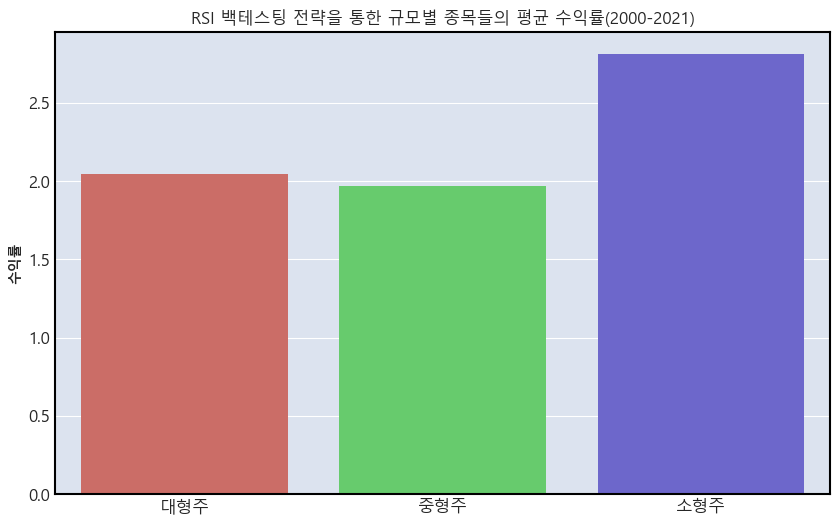

In [88]:
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['figure.figsize'] = (10,6)
sns.barplot(x=df_scale_yeild.index,y=df_scale_yeild['수익률'],palette='hls')
plt.title("RSI 백테스팅 전략을 통한 규모별 종목들의 평균 수익률(2000-2021)",size=12)
plt.ylabel('수익률',size=10)
plt.show()

In [36]:
df_scale_day_kospi_rsi = preprocessing_rsi_backtesting(df_scale_day_kospi)
df_scale_day_kospi_rsi

Open     High      Low    Close     Volume      Volume($)  \
date                                                                       
2003-03-03   578.50   590.55   577.54   590.04  605605682  1436392755820   
2003-03-04   581.09   581.68   573.15   576.58  584630837  1167605903700   
2003-03-05   567.30   567.53   557.68   560.26  764029427  1596423125660   
2003-03-06   564.74   564.87   551.80   555.33  735616162  1452695928615   
2003-03-07   547.89   555.38   544.09   546.02  635049744  1457209430800   
...             ...      ...      ...      ...        ...            ...   
2022-08-26  2489.14  2497.76  2476.75  2481.03  520091055  8628665213503   
2022-08-29  2432.06  2432.89  2417.01  2426.89  448746272  7891467341171   
2022-08-30  2441.21  2453.91  2433.48  2450.93  336555412  6826615309757   
2022-08-31  2433.47  2473.75  2426.14  2472.05  436246626  9562592358058   
2022-09-01  2443.00  2443.61  2415.61  2415.61  580021246  8452317734460   

                  Market_Cap  Change    PER  FWDPER  ...      RSI14  \
date                                                 ...              
2003-03-03   242390079510200    2.54  14.86     0.0  ...        NaN   
2003-03-04   236845967324335   -2.28  14.61     0.0  ...        NaN   
2003-03-05   230133390055930   -2.83  14.19     0.0  ...        NaN   
2003-03-06   228095644447235   -0.88  14.07     0.0  ...        NaN   
2003-03-07   224774859182965   -1.68  13.85     0.0  ...        NaN   
...                      ...     ...    ...     ...  ...        ...   
2022-08-26  1955296364048495    0.15  10.83     0.0  ...  53.835770   
2022-08-29  1913225190390959   -2.18  10.60     0.0  ...  43.380850   
2022-08-30  1932045596372975    0.99  10.70     0.0  ...  48.191986   
2022-08-31  1948130001179758    0.86  10.80     0.0  ...  52.047150   
2022-09-01  1904334718445549   -2.28  10.55     0.0  ...  42.867053   

                RSI30      RSI50     RSI200  매매신호     일간수익률   보유여부     보유수익률  \
date                                                                           
2003-03-03        NaN        NaN        NaN   NaN       NaN  False  1.000000   
2003-03-04        NaN        NaN        NaN   NaN  0.977188  False  1.000000   
2003-03-05        NaN        NaN        NaN   NaN  0.971695  False  1.000000   
2003-03-06        NaN        NaN        NaN   NaN  0.991201  False  1.000000   
2003-03-07        NaN        NaN        NaN   NaN  0.983235  False  1.000000   
...               ...        ...        ...   ...       ...    ...       ...   
2022-08-26  50.448656  47.753705  47.525275   NaN  1.001522   True  1.001522   
2022-08-29  46.039060  45.356568  46.961103   NaN  0.978178   True  0.978178   
2022-08-30  48.121977  46.571765  47.240602   NaN  1.009906   True  1.009906   
2022-08-31  49.880242  47.616100  47.484948   NaN  1.008617   True  1.008617   
2022-09-01  45.607079  45.206542  46.901553   NaN  0.977169   True  0.977169   

              RSI수익률   단순보유수익률  
date                            
2003-03-03  1.000000  1.019948  
2003-03-04  1.000000  0.996681  
2003-03-05  1.000000  0.968470  
2003-03-06  1.000000  0.959948  
2003-03-07  1.000000  0.943855  
...              ...       ...  
2022-08-26  1.566392  4.288729  
2022-08-29  1.532211  4.195143  
2022-08-30  1.547388  4.236698  
2022-08-31  1.560722  4.273207  
2022-09-01  1.525089  4.175644  

[4825 rows x 24 columns]

In [37]:
df_scale_day_large_rsi = preprocessing_rsi_backtesting(df_scale_day_large)
df_scale_day_large_rsi

Open     High      Low    Close     Volume      Volume($)  \
date                                                                       
2003-03-03   563.90   576.71   562.82   576.16  176124677  1024723538890   
2003-03-04   566.70   567.33   558.68   562.34  120717671   707012097640   
2003-03-05   552.62   552.91   543.40   546.02  222922484  1036527326070   
2003-03-06   550.81   550.92   537.85   541.56  180678879   908765005880   
2003-03-07   534.44   543.12   530.95   533.45  150071552  1015597659110   
...             ...      ...      ...      ...        ...            ...   
2022-08-26  2447.27  2456.97  2433.47  2438.00   81340144  4748978712270   
2022-08-29  2388.98  2389.69  2374.70  2383.42   71520687  4395490825446   
2022-08-30  2398.93  2411.68  2389.57  2407.94   62100345  3803581674791   
2022-08-31  2388.71  2432.49  2381.97  2430.78  139601995  6452076158745   
2022-09-01  2398.85  2399.74  2375.07  2375.23   94511147  5131432667210   

                  Market_Cap  Change    PER  FWDPER  ...      RSI14  \
date                                                 ...              
2003-03-03   213027844395175    2.80  13.09     0.0  ...        NaN   
2003-03-04   207905364936635   -2.40  12.77     0.0  ...        NaN   
2003-03-05   201859966571980   -2.90  12.40     0.0  ...        NaN   
2003-03-06   200180515087530   -0.82  12.30     0.0  ...        NaN   
2003-03-07   197255435964315   -1.50  12.12     0.0  ...        NaN   
...                      ...     ...    ...     ...  ...        ...   
2022-08-26  1545142857513360    0.12  10.97     0.0  ...  52.414313   
2022-08-29  1510551030209190   -2.24  10.72     0.0  ...  42.220837   
2022-08-30  1526094512321470    1.03  10.83     0.0  ...  47.189759   
2022-08-31  1540565594591780    0.95  10.94     0.0  ...  51.383796   
2022-09-01  1505362436346015   -2.29  10.69     0.0  ...  42.535860   

                RSI30      RSI50     RSI200  매매신호     일간수익률   보유여부     보유수익률  \
date                                                                           
2003-03-03        NaN        NaN        NaN   NaN       NaN  False  1.000000   
2003-03-04        NaN        NaN        NaN   NaN  0.976014  False  1.000000   
2003-03-05        NaN        NaN        NaN   NaN  0.970978  False  1.000000   
2003-03-06        NaN        NaN        NaN   NaN  0.991832  False  1.000000   
2003-03-07        NaN        NaN        NaN   NaN  0.985025  False  1.000000   
...               ...        ...        ...   ...       ...    ...       ...   
2022-08-26  49.991190  47.686371  47.658176   NaN  1.001244   True  1.001244   
2022-08-29  45.600223  45.285962  47.099041   NaN  0.977613   True  0.977613   
2022-08-30  47.733750  46.520041  47.377789   NaN  1.010288   True  1.010288   
2022-08-31  49.637067  47.642505  47.636095   NaN  1.009485   True  1.009485   
2022-09-01  45.470920  45.283735  47.071307   NaN  0.977147   True  0.977147   

              RSI수익률   단순보유수익률  
date                            
2003-03-03  1.000000  1.021741  
2003-03-04  1.000000  0.997234  
2003-03-05  1.000000  0.968292  
2003-03-06  1.000000  0.960383  
2003-03-07  1.000000  0.946001  
...              ...       ...  
2022-08-26  1.371935  4.323462  
2022-08-29  1.341221  4.226671  
2022-08-30  1.355019  4.270154  
2022-08-31  1.367872  4.310658  
2022-09-01  1.336612  4.212148  

[4825 rows x 24 columns]

In [38]:
df_scale_day_medium_rsi = preprocessing_rsi_backtesting(df_scale_day_medium)
df_scale_day_medium_rsi

Open     High      Low    Close     Volume      Volume($)  \
date                                                                       
2003-03-03   518.94   522.88   518.44   522.72   75298697   160208307515   
2003-03-04   518.53   518.90   511.99   513.71   83133514   154138172225   
2003-03-05   509.89   509.89   500.00   502.52  114599717   248028353975   
2003-03-06   503.72   504.92   493.08   495.54   97464719   231384789005   
2003-03-07   487.55   487.71   480.55   480.55   84000864   194399729995   
...             ...      ...      ...      ...        ...            ...   
2022-08-26  2901.70  2907.75  2891.22  2897.45  129430122  2069257390620   
2022-08-29  2842.38  2849.80  2823.42  2842.55  156902125  1991015536630   
2022-08-30  2852.49  2871.70  2851.70  2865.26   90898583  1660115424679   
2022-08-31  2855.07  2883.23  2841.13  2879.44  107223046  1807780737467   
2022-09-01  2860.52  2864.85  2811.13  2811.13  109276479  1787900560014   

                 Market_Cap  Change   PER  FWDPER  ...      RSI14      RSI30  \
date                                               ...                         
2003-03-03   18334981433750    0.84  0.00     0.0  ...        NaN        NaN   
2003-03-04   18023468511315   -1.72  0.00     0.0  ...        NaN        NaN   
2003-03-05   17636863404765   -2.18  0.00     0.0  ...        NaN        NaN   
2003-03-06   17395688864575   -1.39  0.00     0.0  ...        NaN        NaN   
2003-03-07   16880292022700   -3.02  0.00     0.0  ...        NaN        NaN   
...                     ...     ...   ...     ...  ...        ...        ...   
2022-08-26  244870990378229    0.21  9.64     0.0  ...  60.472157  52.853478   
2022-08-29  240231039723088   -1.89  9.45     0.0  ...  49.779112  48.850495   
2022-08-30  242150506072019    0.80  9.53     0.0  ...  53.446272  50.456206   
2022-08-31  243349450428484    0.49  9.58     0.0  ...  55.625118  51.440851   
2022-09-01  237565412722306   -2.37  9.35     0.0  ...  44.757576  46.805152   

                RSI50     RSI200  매매신호     일간수익률   보유여부  보유수익률    RSI수익률  \
date                                                                       
2003-03-03        NaN        NaN   NaN       NaN  False    1.0  1.000000   
2003-03-04        NaN        NaN   NaN  0.982763  False    1.0  1.000000   
2003-03-05        NaN        NaN   NaN  0.978217  False    1.0  1.000000   
2003-03-06        NaN        NaN   NaN  0.986110  False    1.0  1.000000   
2003-03-07        NaN        NaN   NaN  0.969750  False    1.0  1.000000   
...               ...        ...   ...       ...    ...    ...       ...   
2022-08-26  49.180957  48.657429   NaN  1.002075  False    1.0  0.920555   
2022-08-29  47.081223  48.164725   NaN  0.981052  False    1.0  0.920555   
2022-08-30  48.018006  48.382025   NaN  1.007989  False    1.0  0.920555   
2022-08-31  48.597760  48.517460   NaN  1.004949  False    1.0  0.920555   
2022-09-01  46.071900  47.908863   NaN  0.976277  False    1.0  0.920555   

             단순보유수익률  
date                  
2003-03-03  1.007284  
2003-03-04  0.989922  
2003-03-05  0.968359  
2003-03-06  0.954908  
2003-03-07  0.926022  
...              ...  
2022-08-26  5.583401  
2022-08-29  5.477608  
2022-08-30  5.521370  
2022-08-31  5.548695  
2022-09-01  5.417062  

[4825 rows x 24 columns]

In [39]:
df_scale_day_small_rsi = preprocessing_rsi_backtesting(df_scale_day_small)
df_scale_day_small_rsi

Open     High      Low    Close     Volume      Volume($)  \
date                                                                       
2003-03-03   347.08   349.83   347.08   349.54  158075697   123607110585   
2003-03-04   348.46   348.72   345.54   346.07  165232104   119971802645   
2003-03-05   343.70   343.90   334.10   335.79  202227898   149967917380   
2003-03-06   336.19   337.61   330.36   331.03  217042745   142321547160   
2003-03-07   326.07   326.17   319.69   319.69  183073165   123401526875   
...             ...      ...      ...      ...        ...            ...   
2022-08-26  2372.65  2380.87  2369.89  2375.06  305802777  1713066593266   
2022-08-29  2337.11  2337.11  2312.30  2328.34  214153156  1351732010336   
2022-08-30  2333.80  2348.70  2329.10  2348.66  180384908  1287199257500   
2022-08-31  2342.61  2359.24  2337.97  2358.82  184986891  1164463285070   
2022-09-01  2352.11  2352.26  2311.51  2311.64  372125845  1415390114983   

                Market_Cap  Change    PER  FWDPER  ...      RSI14      RSI30  \
date                                               ...                         
2003-03-03   5610535930555    0.33  13.07     0.0  ...        NaN        NaN   
2003-03-04   5553022702215   -0.99  12.93     0.0  ...        NaN        NaN   
2003-03-05   5389215474010   -2.97  12.57     0.0  ...        NaN        NaN   
2003-03-06   5315402530475   -1.42  12.51     0.0  ...        NaN        NaN   
2003-03-07   5136532544925   -3.43  12.09     0.0  ...        NaN        NaN   
...                    ...     ...    ...     ...  ...        ...        ...   
2022-08-26  97629115589076    0.47  12.04     0.0  ...  59.669451  52.174693   
2022-08-29  95718232381078   -1.97  11.80     0.0  ...  48.698017  48.186951   
2022-08-30  96645571016695    0.87  11.92     0.0  ...  52.765935  49.909481   
2022-08-31  97075431198633    0.43  11.97     0.0  ...  54.700085  50.756264   
2022-09-01  95243373097036   -2.00  11.73     0.0  ...  45.402618  46.943992   

                RSI50     RSI200  매매신호     일간수익률   보유여부  보유수익률    RSI수익률  \
date                                                                       
2003-03-03        NaN        NaN   NaN       NaN  False    1.0  1.000000   
2003-03-04        NaN        NaN   NaN  0.990073  False    1.0  1.000000   
2003-03-05        NaN        NaN   NaN  0.970295  False    1.0  1.000000   
2003-03-06        NaN        NaN   NaN  0.985824  False    1.0  1.000000   
2003-03-07        NaN        NaN   NaN  0.965743  False    1.0  1.000000   
...               ...        ...   ...       ...    ...    ...       ...   
2022-08-26  49.137697  49.309793   NaN  1.004700  False    1.0  1.206816   
2022-08-29  47.042364  48.796270   NaN  0.980329  False    1.0  1.206816   
2022-08-30  48.025966  49.028305   NaN  1.008727  False    1.0  1.206816   
2022-08-31  48.513860  49.144114   NaN  1.004326  False    1.0  1.206816   
2022-09-01  46.447803  48.628479   NaN  0.979998  False    1.0  1.206816   

             단순보유수익률  
date                  
2003-03-03  1.007088  
2003-03-04  0.997090  
2003-03-05  0.967471  
2003-03-06  0.953757  
2003-03-07  0.921084  
...              ...  
2022-08-26  6.842976  
2022-08-29  6.708367  
2022-08-30  6.766913  
2022-08-31  6.796185  
2022-09-01  6.660251  

[4825 rows x 24 columns]

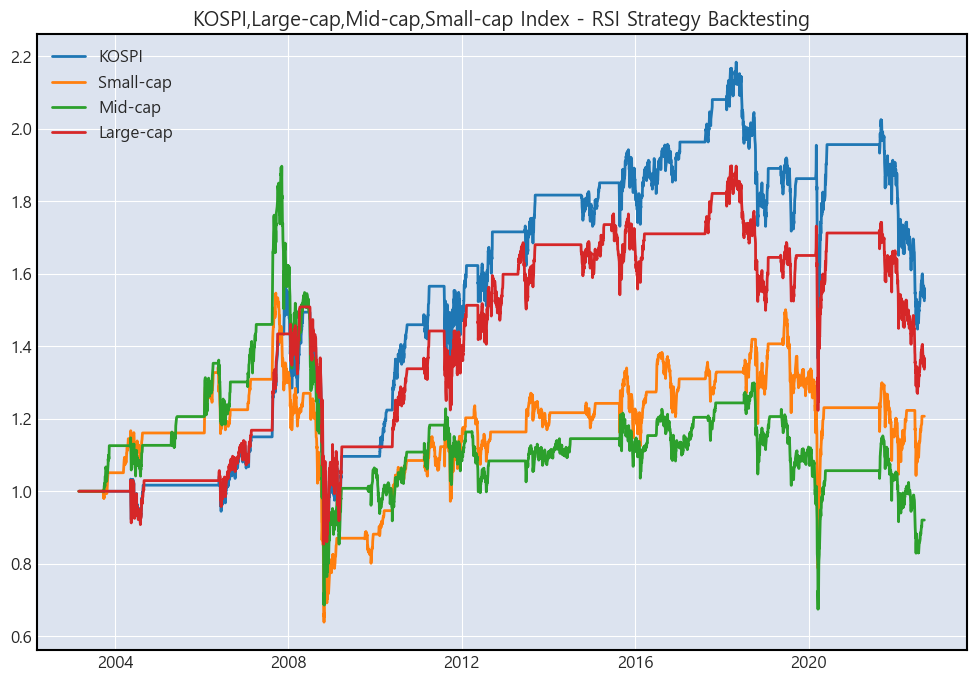

In [40]:
# RSI 백테스팅을 통한 코스피,대형주,중형주,소형주 지수 수익률(2003~2021)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.plot(df_scale_day_kospi_rsi['RSI수익률'],label="KOSPI")
ax.plot(df_scale_day_small_rsi['RSI수익률'],label="Small-cap")
ax.plot(df_scale_day_medium_rsi['RSI수익률'],label="Mid-cap")
ax.plot(df_scale_day_large_rsi['RSI수익률'],label="Large-cap")

plt.legend()
plt.title("KOSPI,Large-cap,Mid-cap,Small-cap Index - RSI Strategy Backtesting")
plt.show()

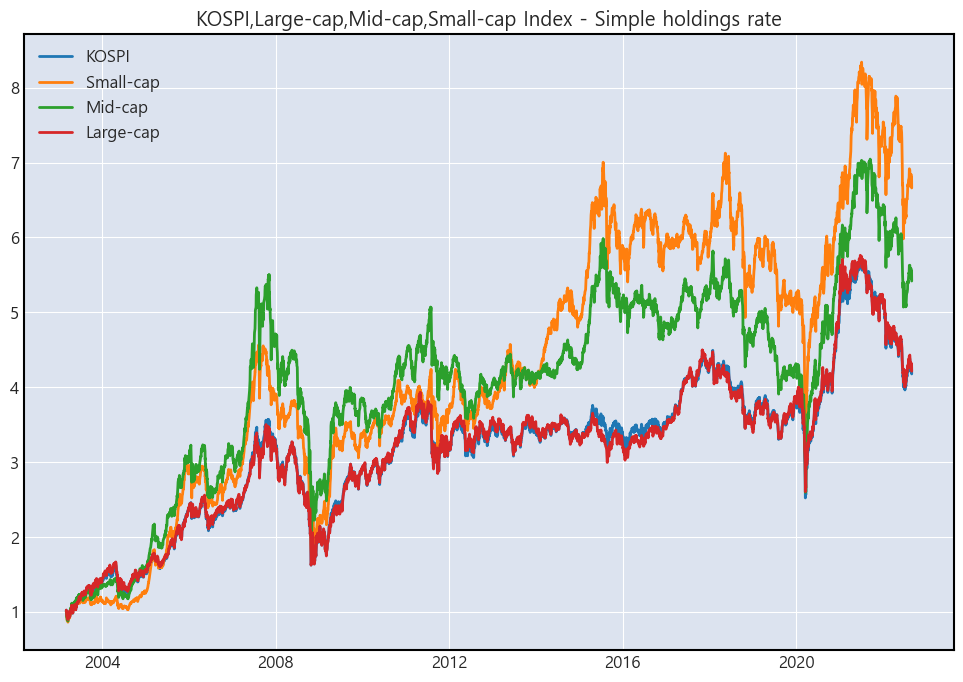

In [41]:
# 단순 보유 수익률(위에 있는 지수 추이변화 그래프와 동일. 지수화를 시켰기때문에 모양 자체가 같게 나옴)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.plot(df_scale_day_kospi_rsi['단순보유수익률'],label="KOSPI")
ax.plot(df_scale_day_small_rsi['단순보유수익률'],label="Small-cap")
ax.plot(df_scale_day_medium_rsi['단순보유수익률'],label="Mid-cap")
ax.plot(df_scale_day_large_rsi['단순보유수익률'],label="Large-cap")

plt.legend()
plt.title("KOSPI,Large-cap,Mid-cap,Small-cap Index - Simple holdings rate")
plt.show()

In [66]:
kospi_stocks_yeild.to_frame().value_counts()

1.000000     2
0.001963     1
2.200141     1
2.127668     1
2.132915     1
            ..
0.960627     1
0.961976     1
0.964246     1
0.965704     1
65.192367    1
Length: 815, dtype: int64

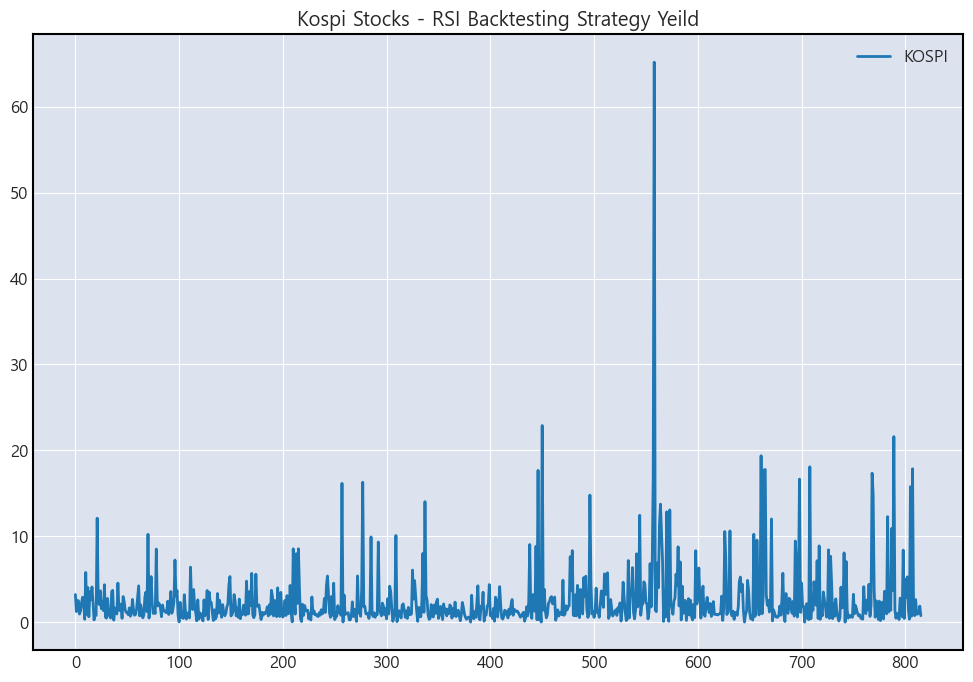

In [68]:
# 코스피 각 종목별 RSI 수익률
fig = plt.figure(figsize=(12,8))
plt.plot(kospi_stocks_yeild,label="KOSPI")

plt.legend()
plt.title("Kospi Stocks - RSI Backtesting Strategy Yeild")
plt.show()

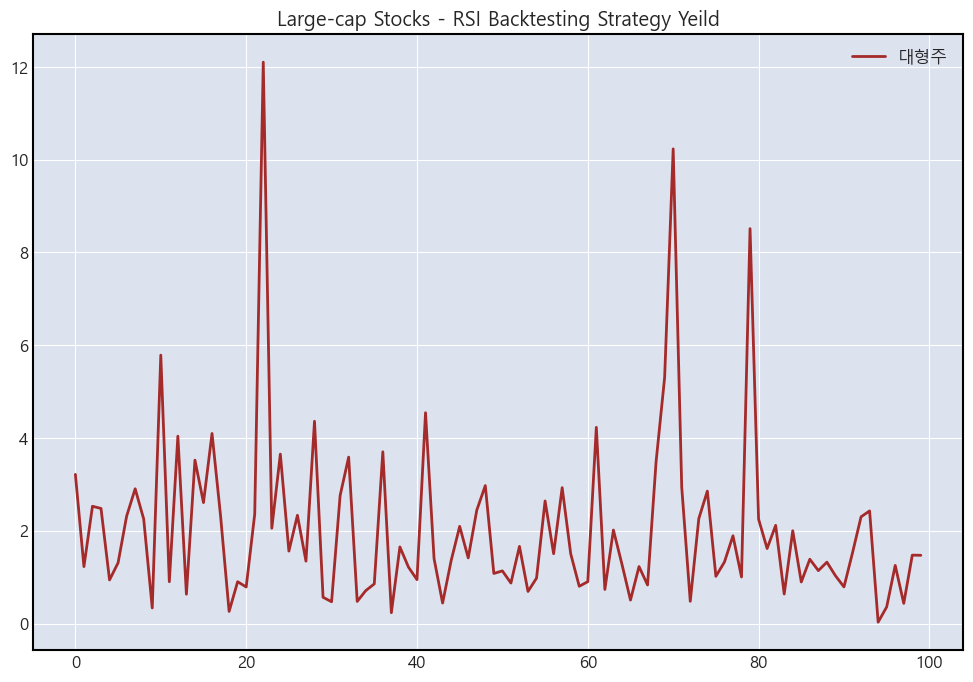

In [80]:
# 대형주 각 종목별 RSI 수익률
fig = plt.figure(figsize=(12,8))
plt.plot(large_stocks_yeild,label="대형주",color='brown')

plt.legend()
plt.title("Large-cap Stocks - RSI Backtesting Strategy Yeild")
plt.show()

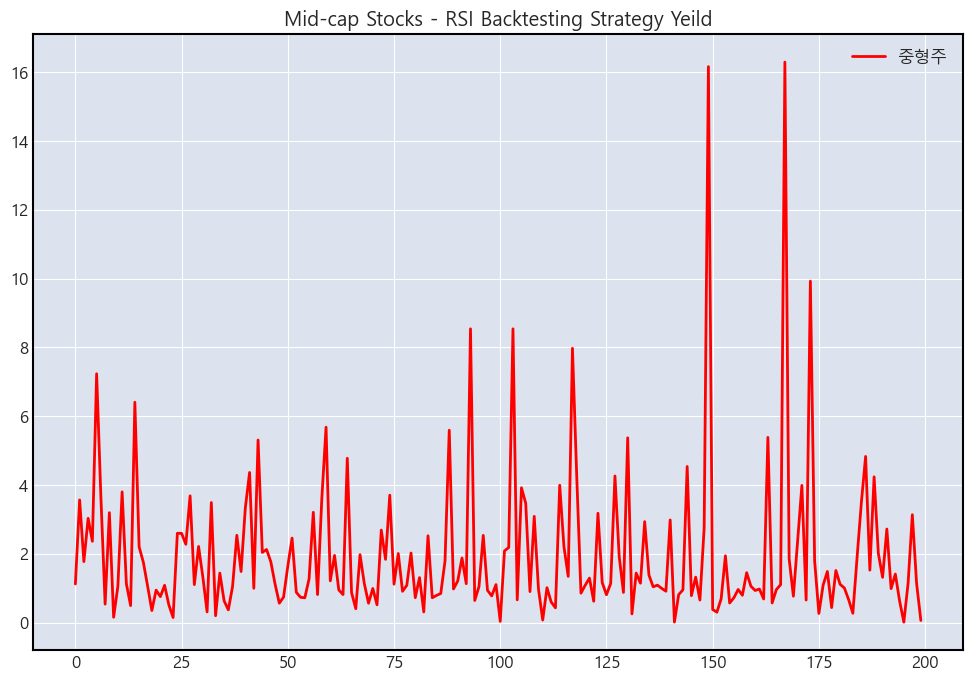

In [81]:
# 코스피 각 종목별 RSI 수익률
fig = plt.figure(figsize=(12,8))
plt.plot(medium_stocks_yeild,label="중형주",color='red')

plt.legend()
plt.title("Mid-cap Stocks - RSI Backtesting Strategy Yeild")
plt.show()

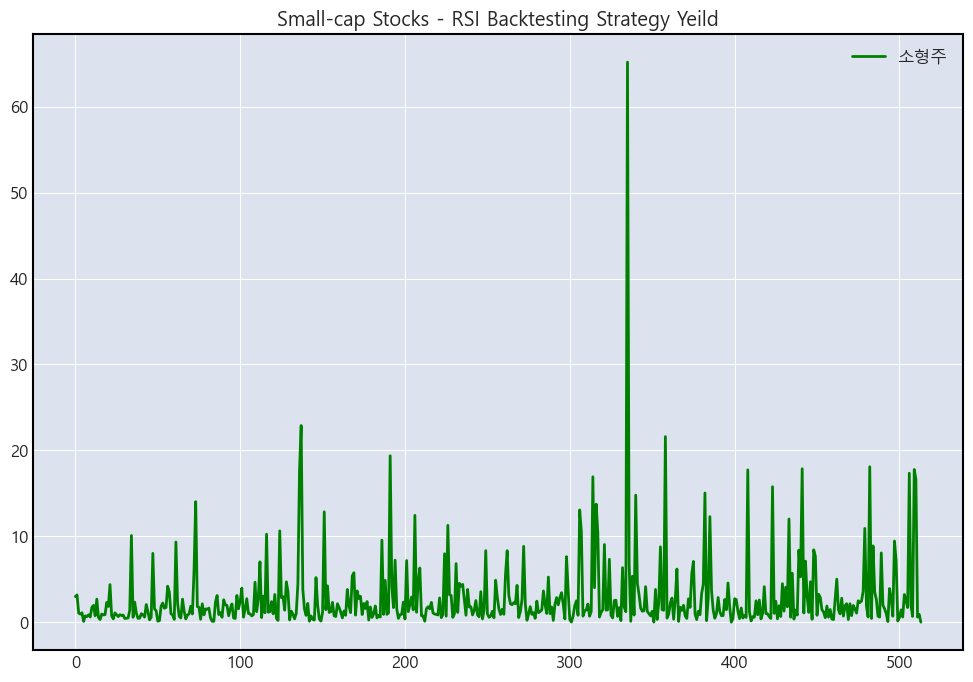

In [82]:
# 소형주 각 종목별 RSI 수익률
fig = plt.figure(figsize=(12,8))
plt.plot(small_stocks_yeild,label="소형주",color='green')

plt.legend()
plt.title("Small-cap Stocks - RSI Backtesting Strategy Yeild")
plt.show()